Loss:  0.5
Loss:  0.5
Loss:  1.0
Loss:  0.5
Loss:  0.0


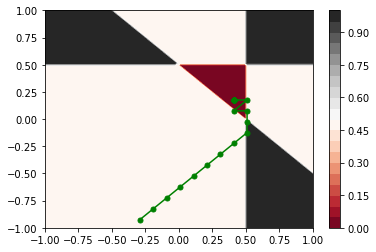

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def scalar(x):
  return np.array([[1] if n>=0.5 else [0] for n in x])
def dscalar(y):
  return 1

x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

t = [[0], [0], [0], [1]]

# Training
w = np.random.uniform(-1, 1, [2, 1])
lr = .1
history = [w.copy()]

for i in range(20):
  # Forward
  u = x @ w
  y = scalar(u)
  l = 1/2*np.sum((t - y)**2)
  if(i%4==0):
    print('Loss: ', l)
  
  # Backward
  dy = -1*(t - y)
  du = dy*dscalar(y)
  dw = x.T @ du
  w -= lr*dw
  history.append(w.copy())
  
def f(_w):
  u = x @ _w
  y = scalar(u)
  l = 1/2*np.sum((t - y)**2)
  return l

# Graphic
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)

Z = np.stack((X, Y), axis=2)
Z = [[f(w) for w in z] for z in Z]

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.plot(np.array(history)[:,0], np.array(history)[:,1], color='green', marker='o', markersize=5)
plt.colorbar();

Loss:  0.5285483415871955
Loss:  0.5013270447881324
Loss:  0.5001022254096738
Loss:  0.5000077449008935
Loss:  0.5000005860172498


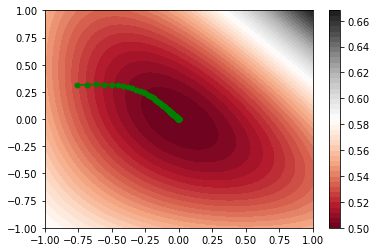

In [0]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))
def dsigmoid(y):
  return y*(1 - y)

x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

t = [[0], [0], [0], [1]]

# Training
w = np.random.uniform(-1, 1, [2, 1])
lr = 1
history = [w.copy()]

for i in range(100):  
  # Forward
  u = x @ w
  y = sigmoid(u)
  l = 1/2*np.sum((t - y)**2)
  if(i%20==0): 
    print('Loss: ', l)
  
  # Backward
  dy = -1*(t - y)
  du = dy*dsigmoid(y)
  dw = x.T @ du
  w -= lr*dw
  history.append(w.copy())

def f(w):
  u = x @ w
  y = sigmoid(u)
  l = 1/2*np.sum((t - y)**2)
  return l

# Graphic
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)

Z = np.stack((X, Y), axis=-1)
Z = [[f(np.atleast_2d(w).T) for w in z] for z in Z]

plt.contourf(X, Y, Z, 50, cmap='RdGy')
plt.plot(np.array(history)[:,0], np.array(history)[:,1], color='green', marker='o', markersize=5)
plt.colorbar();